In [1]:
#to install R :
#conda install -c r r-irkernel
# to install a library from R
#!pip install library edgeR

In [2]:
#we just do it once
#!pip3 install xgboost

In [3]:
# a pachage that might need for some normalisation later on.
#!pip install rnanorm;
#import rnanorm

In [4]:
#this package has many of the normalisation procedures.
#!pip install bioinfokit
#!pip install bioinfokit --upgrade 

In [5]:
#!pip install conorm
from bioinfokit.analys import norm, get_data
import bioinfokit
import conorm # for tmm normalisation

In [6]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from pathlib import Path
import functools
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
import xgboost

In [8]:
#!pip show xgboost


In [9]:
#loading the counts data

path1=Path("/home/znazari/machine_learning_ppmi")

quant_rna1=pd.read_csv(path1/"ordered_bl_matrix_ir2_count.txt", header=None,index_col=[0] )
quant_rna=quant_rna1.rename(columns=quant_rna1.iloc[0]).drop(quant_rna1.index[0]).reset_index(drop=True)

In [10]:
#grest idea to set the geneid as an index counter so to avoid its confliction with the rest.
dff1 = quant_rna.set_index('Geneid')

In below we do the following steps:

1- we filter the rows in which their average is less than 5.

2- we apply tmm normalisation

3- we take log2 of the data

In [11]:
#finding average of each row, and making a new column for the average
i_average=dff1.mean(axis=1)
i_average
dff1["average"]=i_average

In [12]:
#we filter all the rows that their average is less than 5,then we drop the nan value rows
filter = dff1["average"]>5
# filtering data
dff1.where(filter, inplace = True)
dff_drop=dff1.dropna()
dff_drop

,10874,12499,12593,13039,13424,14281,14331,14426,15761,16580,...,41381,4139,60002,60015,60024,60036,60095,60171,85242,average
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,10.0,10.0,12.0,7.0,10.0,5.0,7.0,4.0,4.0,4.0,...,7.0,4.0,9.0,9.0,8.0,11.0,2.0,1.0,6.0,5.366337
ENSG00000227232.4,192.0,418.0,276.0,252.0,292.0,235.0,162.0,209.0,128.0,99.0,...,260.0,216.0,158.0,205.0,210.0,512.0,211.0,134.0,432.0,228.336634
ENSG00000238009.2,38.0,67.0,93.0,33.0,54.0,33.0,43.0,47.0,16.0,48.0,...,39.0,32.0,113.0,61.0,131.0,102.0,57.0,6.0,141.0,53.974540
ENSG00000237683.5,28.0,82.0,38.0,31.0,125.0,155.0,44.0,38.0,25.0,31.0,...,70.0,50.0,65.0,80.0,210.0,307.0,43.0,12.0,1171.0,97.002829
ENSG00000239906.1,5.0,26.0,13.0,16.0,15.0,23.0,4.0,1.0,4.0,6.0,...,8.0,3.0,3.0,12.0,11.0,27.0,5.0,3.0,29.0,8.961810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,346.0,142.0,169.0,158.0,138.0,241.0,65.0,83.0,493.0,69.0,...,205.0,102.0,136.0,69.0,86.0,132.0,59.0,142.0,92.0,188.437058
ENSG00000210194.1,48.0,17.0,28.0,24.0,24.0,54.0,3.0,7.0,85.0,10.0,...,29.0,9.0,25.0,10.0,16.0,13.0,12.0,13.0,4.0,27.509194
ENSG00000198727.2,766.0,1506.0,405.0,379.0,1316.0,581.0,501.0,328.0,517.0,192.0,...,583.0,339.0,461.0,498.0,1049.0,1260.0,494.0,402.0,2501.0,699.930693


In [13]:
# to add one so that later when we take log2 we do not end with conflict
dff=dff_drop.add(1)

In [14]:
#Trimmed Means of M-values (tmm)
dff_tmm = conorm.tmm(dff)
dff_tmm

,10874,12499,12593,13039,13424,14281,14331,14426,15761,16580,...,41381,4139,60002,60015,60024,60036,60095,60171,85242,average
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,10.812494,10.397455,8.566761,10.328820,9.786650,5.405589,9.587683,5.572286,4.501203,7.982187,...,6.826665,5.546227,10.198584,11.210733,10.396146,12.590933,3.245330,2.926938,6.344008,5.521913
ENSG00000227232.4,189.710130,396.048503,182.537897,326.648920,260.680759,212.619822,195.349050,234.036003,116.131027,159.643743,...,222.719944,240.706243,162.157488,230.941104,243.731868,538.262377,229.336620,197.568297,392.422213,198.917680
ENSG00000238009.2,38.335208,64.275175,61.944268,43.897483,48.933248,30.631669,52.732259,53.493944,15.304089,78.225434,...,34.133325,36.605097,116.263859,69.506546,152.476809,108.072173,62.743037,10.244282,128.692735,47.682779
ENSG00000237683.5,28.505667,78.453522,25.700282,41.315278,112.101623,140.545306,53.930719,43.463829,23.406253,51.085998,...,60.586652,56.571513,67.310655,90.806939,243.731868,323.167275,47.598166,19.025095,1062.168206,85.003844
ENSG00000239906.1,5.897724,25.521025,9.225742,21.948742,14.235127,21.622355,5.992302,2.228914,4.501203,11.175062,...,7.679998,4.436981,4.079434,14.573953,13.861528,29.378843,6.490659,5.853875,27.188606,8.640487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,341.085052,135.166912,112.026868,205.285290,123.667664,218.025410,79.098388,93.614401,444.718815,111.750620,...,175.786623,114.252272,139.720603,78.475133,100.496078,139.549505,64.906590,209.276048,84.284679,164.310339
ENSG00000210194.1,48.164748,17.014017,19.110466,32.277561,22.242386,49.551230,4.793842,8.915657,77.420684,17.560812,...,25.599994,11.092454,26.516319,12.331807,19.637165,14.689422,14.063095,20.488564,4.531434,24.727766
ENSG00000198727.2,753.925749,1424.451299,267.546520,490.618932,1171.728871,524.342103,601.627136,366.656405,466.324588,308.112423,...,498.346542,377.143422,471.174587,559.415588,1212.883705,1323.097188,535.479371,589.777952,2267.529738,607.960033


In [15]:
#log2 normalisation
log_tmm=np.log2(dff_tmm)
data_log_tmm=pd.DataFrame(log_tmm)
data_log_tmm

,10874,12499,12593,13039,13424,14281,14331,14426,15761,16580,...,41381,4139,60002,60015,60024,60036,60095,60171,85242,average
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,3.434627,3.378158,3.098750,3.368603,3.290815,2.434452,3.261182,2.478269,2.170310,2.996784,...,2.771181,2.471507,3.350297,3.486809,3.377977,3.654313,1.698365,1.549392,2.665395,2.465168
ENSG00000227232.4,7.567653,8.629533,7.512052,8.351597,8.026140,7.732132,7.609910,7.870587,6.859610,7.318712,...,7.799087,7.911130,7.341252,7.851381,7.929151,9.072166,7.841323,7.626208,8.616263,7.636028
ENSG00000238009.2,5.260598,6.006190,5.952899,5.456066,5.612743,4.936952,5.720614,5.741304,3.935845,6.289566,...,5.093109,5.193973,6.861259,6.119077,7.252446,6.755851,5.971383,3.356747,7.007787,5.575396
ENSG00000237683.5,4.833177,6.293766,4.683712,5.368603,6.808663,7.134891,5.753035,5.441743,4.548822,5.674856,...,5.920928,5.822004,6.072763,6.504731,7.929151,8.336137,5.572834,4.249832,10.052797,6.409456
ENSG00000239906.1,2.560158,4.673614,3.205665,4.456066,3.831383,4.434452,2.583110,1.156341,2.170310,3.482211,...,2.941106,2.149579,2.028369,3.865320,3.793014,4.876706,2.698365,2.549392,4.764930,3.111113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,8.413988,7.078598,6.807701,7.681486,6.950325,7.768352,6.305576,6.548659,8.796750,6.804139,...,7.457681,6.836079,7.126401,6.294164,6.650995,7.124633,6.020293,7.709263,6.397198,7.360279
ENSG00000210194.1,5.589906,4.088652,4.256291,5.012460,4.475240,5.630849,2.261182,3.156341,6.274647,4.134288,...,4.678072,3.471507,4.728809,3.624312,4.295515,3.876706,3.813842,4.356747,2.179968,4.628060
ENSG00000198727.2,9.558279,10.476191,8.063646,8.938459,10.194423,9.034365,9.232726,8.518285,8.865191,8.267313,...,8.961006,8.558969,8.880118,9.127777,10.244226,10.369703,9.064687,9.204028,11.146906,9.247833


In [16]:
#the first step to get the cpm norm is these two lines
#nm = norm()
#nm.cpm(df=dff)
#here is the cpm norm taking step 
#cpm_df = nm.cpm_norm
#cpm_df.head(5)

In [17]:
#loading the quant diagnosis: prediction

quant_predict1=pd.read_csv(path1/"the_diagnosis_count_ir2.txt", header=None ,index_col=[0])
quant_predict=quant_predict1.rename(columns=quant_predict1.iloc[0]).drop(quant_predict1.index[0]).reset_index(drop=True)

In [18]:
#transposed matrix
t_quant=data_log_tmm.T
t_quant

Geneid,ENSG00000223972.4,ENSG00000227232.4,ENSG00000238009.2,ENSG00000237683.5,ENSG00000239906.1,ENSG00000241860.2,ENSG00000222623.1,ENSG00000228463.4,ENSG00000230021.3,ENSG00000225630.1,...,ENSG00000198938.2,ENSG00000198840.2,ENSG00000212907.2,ENSG00000198886.2,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
10874,3.434627,7.567653,5.260598,4.833177,2.560158,6.820686,3.145121,5.260598,3.145121,5.062659,...,12.790779,10.190729,8.567653,9.907411,8.975196,8.413988,5.589906,9.558279,5.952476,7.384587
12499,3.378158,8.629533,6.006190,6.293766,4.673614,8.037668,5.673614,7.386332,2.918727,4.963121,...,13.075600,9.975365,8.450108,10.542608,9.496156,7.078598,4.088652,10.476191,5.700087,6.984816
12593,3.098750,7.512052,5.952899,4.683712,3.205665,6.921872,4.305201,6.882126,2.720238,2.857742,...,10.983742,7.583185,5.329047,7.968166,7.274827,6.807701,4.256291,8.063646,3.485773,5.442704
13039,3.368603,8.351597,5.456066,5.368603,4.456066,7.412998,4.275494,7.672384,4.456066,4.175958,...,11.749606,9.169503,7.487545,9.153238,8.169503,7.681486,5.012460,8.938459,6.456066,8.163019
13424,3.290815,8.026140,5.612743,6.808663,3.831383,7.814377,5.446093,6.864806,3.831383,4.153312,...,12.238651,9.119096,8.680006,10.390761,9.808663,6.950325,4.475240,10.194423,6.864806,7.939908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60036,3.654313,9.072166,6.755851,8.336137,4.876706,8.340814,4.069351,7.239276,4.528782,5.239276,...,13.143158,10.036577,9.058035,10.824238,9.798972,7.124633,3.876706,10.369703,6.278804,7.804060
60095,1.698365,7.841323,5.971383,5.572834,2.698365,7.293312,4.200865,7.854869,2.435331,3.435331,...,11.584570,8.806889,6.971383,9.023296,8.221927,6.020293,3.813842,9.064687,5.242685,6.221927
60171,1.549392,7.626208,3.356747,4.249832,2.549392,5.834794,2.871320,5.249832,3.356747,4.456283,...,12.155797,9.404260,7.688943,9.441176,8.317576,7.709263,4.356747,9.204028,6.330752,7.249832
85242,2.665395,8.616263,7.007787,10.052797,4.764930,8.509091,3.317471,7.450497,2.858040,5.716021,...,11.206768,7.982161,9.642675,10.944176,10.702745,6.397198,2.179968,11.146906,4.612927,5.835320


In [19]:
searchfor = ['Healthy Control', "Parkinson's Disease"]


In [20]:
#we just pick those that are either health control or parkinson's diseases
quant_p=quant_predict[quant_predict['COHORT_DEFINITION'].astype(str).str.contains('|'.join(searchfor))]

In [21]:
quant_p

,BL_PATNO,COHORT_DEFINITION
0,10874,Parkinson's Disease
1,12499,Healthy Control
2,12593,Parkinson's Disease
3,13039,Parkinson's Disease
4,13424,Parkinson's Disease
...,...,...
696,4127,Healthy Control
697,4136,Parkinson's Disease
698,41381,Parkinson's Disease
700,60002,Healthy Control


In [22]:
(quant_p.COHORT_DEFINITION == 0).sum()

0

In [23]:
quant_new_predict=quant_p['BL_PATNO']

In [24]:
r_quant_patients=[int(x) for x in quant_new_predict]

In [25]:
#here we select those rna-seq data that includes both health control and parkinson 
selected_quant_rna=data_log_tmm[r_quant_patients]

In [26]:
select_quant_rna=selected_quant_rna.T

In [27]:
quant_p['COHORT_DEFINITION'].replace(['Healthy Control', "Parkinson's Disease"],
                        [0, 1], inplace=True)

/tmp/ipykernel_25414/93247712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_p['COHORT_DEFINITION'].replace(['Healthy Control', "Parkinson's Disease"],


In [28]:
#to check how many Parkinson and Health control we are using.
(quant_p.COHORT_DEFINITION == 0).sum()

190

In [29]:
from sklearn.utils import class_weight


In [30]:
#here we make the model
bst_q = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')


In [31]:
#here we repeat the machine learning procedure for k times
# here we also make the code balanced with the provided data.
k=5
g0=0
for i in range(k):
    X_trainq, X_testq, y_trainq, y_testq = train_test_split(select_quant_rna,quant_p['COHORT_DEFINITION'], test_size=.3)
    classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_trainq)
    bst_q.fit(X_trainq, y_trainq,sample_weight=classes_weights )
    preds_q = bst_q.predict(X_testq)
    accuracy = accuracy_score(y_testq, preds_q)
    g= (accuracy * 100.0)
    g+=g0
    g0=g
print(round(g/k,2))

55.71


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_curve

import matplotlib.pyplot as plt

In [33]:
print('Accuracy:  ', accuracy_score(y_testq,bst_q.predict(X_testq)))
print('Precision: ', precision_score(y_testq,bst_q.predict(X_testq)))
print('Recall:    ', recall_score(y_testq,bst_q.predict(X_testq)))
print('F1:        ', f1_score(y_testq,bst_q.predict(X_testq)))
print('ROC-AUC:   ', roc_auc_score(y_testq,bst_q.predict(X_testq)))
print('\nConfusion Matrix\n{0}'.format(confusion_matrix(y_testq,bst_q.predict(X_testq))))

Accuracy:   0.5310734463276836
Precision:  0.7888888888888889
Recall:     0.5259259259259259
F1:         0.6311111111111111
ROC-AUC:    0.5367724867724868

Confusion Matrix
[[23 19]
 [64 71]]


*confusion matrix* TN, FP; FN, TP

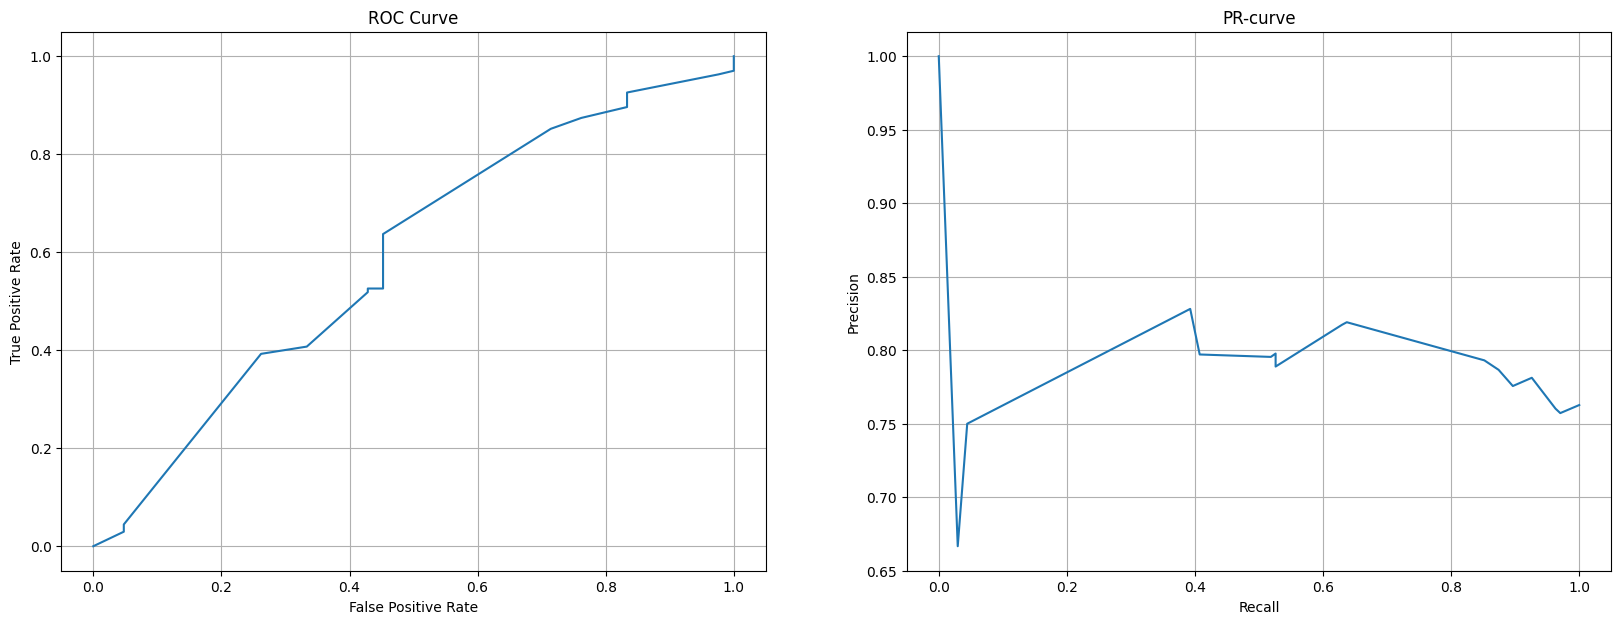

In [34]:
roc = roc_curve(y_testq,bst_q.predict_proba(X_testq)[:,1])
pr  = precision_recall_curve(y_testq,bst_q.predict_proba(X_testq)[:,1])

f = plt.figure(figsize=(20,7))
ax = f.add_subplot(121)
ax.plot(roc[0],roc[1])
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
ax.set_title('ROC Curve')
ax.grid(which='both')
ax = f.add_subplot(122)
ax.plot(pr[1],pr[0])
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.set_title('PR-curve')
ax.grid(which='both')
plt.show()